# ECG dataset  

### Description 

An electrocardiogram (ECG) is a simple test that can be used to check your heart's rhythm and electrical activity. Sensors attached to the skin are used to detect the electrical signals produced by the heart each time it beats.

### Introduction

Cardiovascular diseases are one of the leading causes of death worldwide. An ECG is the most representative and important non-invasive tool for diagnosing cardiac abnormalities.At every beat, the heart is depolarized to trigger its contraction. This electrical activity is transmitted throughout the body and can be picked up on the skin. An ECG machine records this activity via electrodes on the skin and displays it graphically.

An ECG is a graph of voltage with respect to time that reflects the electrical activities of cardiac muscle depolarization followed by repolarization during each heartbeat. The ECG graph of a normal beat consists of a sequence of waves, a P-wave representing the atrial depolarization process, a QRS complex denoting the ventricular depolarization process, and a T-wave representing the ventricular repolarization. Other portions of the signal include the PR, ST, and QT intervals. 

Commonly, 10 electrodes attached to the body are used to form 12 ECG leads, with each lead measuring a specific electrical potential difference. Electrodes combinations can measure the electrical potential difference between two corresponding locations of attachment. Such a pair forms a lead. The different leads are regularly divided into limb; augmented limb; and precordial or chest leads. The 12-lead ECG has a total of three limb leads (I, II, II) and three augmented limb leads (aVR, aVL, aVF) corresponding to a coronal plane (vertical), and six precordial leads or chest leads (V1-V6) that lie on the perpendicular transverse plane (horizontal).

A resting 12-lead ECG is recorded at each visit for participants. The record length is 10 seconds and the sample rate is 1000Hz. We collect both the raw waveform ECG signal from all leads and tabular data. The tabular data are features which have been extracted automatically by the machine from the raw data such as the P wave duration.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
A 10 second resting electrocardiogram (ECG) using a 12 Lead Norav ECG machine is done for each participant. The equipment used includes an electrode belt, limb crocodile clips, a 12 Lead Norav ECG machine, and a device cart and computer. 

The device settings include a sample rate of 1000Hz, a minimum test time of 10 seconds, and various filters such as an AC noise filter, EMG filter, and a baseline filter. The protocol involves turning on the computer and entering the "resting ECG" software, verifying the participant's identity, and attaching the electrode belt and limb crocodile clips to the participant's chest. The figure below shows the software system used to record the ECG.

The participant is instructed to take normal deep breaths and to remain still during the 10 second recording. The ECG is then interpreted and, if necessary, the test can be repeated.

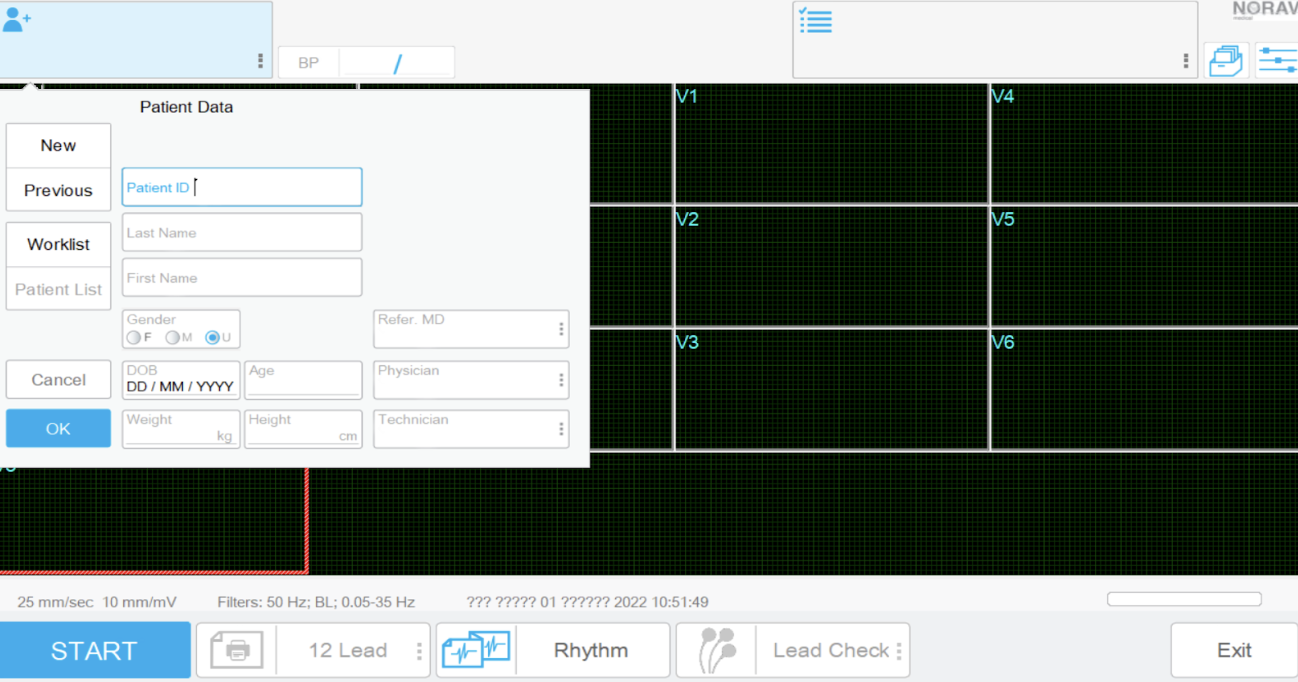

### Data availability 
<!-- for the example notebooks -->
The information is stored in 2 tabular parquet files: `ecg.parquet`, `ecg_qc.parquet`, which contain tabular features and QC checks on the raw ECG waveform data. Mutiple time series parquet files contain the raw and processed ECG waveform data

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/015-ecg.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/15)

In [1]:
%load_ext autoreload
%autoreload 2

from pheno_utils import PhenoLoader
import matplotlib.pyplot as plt
from pheno_utils.ecg_analysis import vis_ecg

In [2]:
pl = PhenoLoader('ecg', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for ecg with
164 fields
3 tables: ['ecg', 'ecg_qc', 'age_sex']

# Data dictionary

In [3]:
#load in dictionary
pl.dict.head()

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,...,stability,sexed,debut,completed,min_plausible_value,max_plausible_value,dependency,customer_field,parent_dataframe,Unnamed: 0
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),15.0,ecg,Date,Collection time,NaN,Single,datetime64[ns],NaN,...,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timezone,Timezone,Timezone for timestamp columns,15.0,ecg,Text,Collection time,NaN,Single,string,NaN,...,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection_timestamp,Collection timestamp,Collection timestamp,15.0,ecg,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raw_ecg_time_series,Raw ECG times series file path,S3 reference to raw ECG time series,15.0,raw_timeseries_long,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
processed_ecg_time_series,Processed ECG times series file path,S3 reference to processed ECG time series,15.0,processed_timeseries_long,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pl.dfs['ecg'].head()

,,,,collection_date,timezone,raw_ecg_time_series,processed_ecg_time_series,raw_ecg_time_series_wide,processed_ecg_time_series_wide,hr_bpm,p_ms,pr_ms,qrs_ms,...,t_mv_III,t_mv_V1,t_mv_V2,t_mv_V3,t_mv_V4,t_mv_V5,t_mv_V6,non_confirmed_diagnosis,qrs,st_t
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
5516424321,10k,00_00_visit,0,2019-12-28,asia/jerusalem,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,75.643396,98.796804,149.207492,80.370043,...,NaN,NaN,-3.938265,1.063769,1.601919,-1.634136,-2.449547,sinus bradycardia first degree AV block (limited),anterolateral infarct\r\r R < 0.15 mV in V3 ...,normal
5027574288,10k,00_00_visit,0,2022-03-05,asia/jerusalem,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,81.198703,110.089571,165.401339,74.480490,...,0.64,0.660000,-3.104172,0.314426,0.137478,0.229987,-3.724118,sinus bradycardia premature ventricular comple...,normal,normal
7783260382,10k,00_00_visit,0,2020-12-30,asia/jerusalem,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,66.884172,135.717458,157.628969,112.282826,...,0.64,-2.173566,-4.311605,1.710000,0.848027,-0.605386,-4.216907,sinus bradycardia first degree AV block,normal,normal
1178277844,10k,00_00_visit,0,2021-08-09,asia/jerusalem,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,52.824653,118.399289,108.174493,95.430899,...,0.64,-3.824544,-2.201717,0.605452,1.640000,1.281194,-2.158325,sinus arrhythmia,normal,normal
1622660825,10k,00_00_visit,0,2020-07-12,asia/jerusalem,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,62.484369,117.228797,151.605412,74.817144,...,0.64,-1.541542,1.960000,0.172236,-1.425811,0.792824,-0.231174,Message: One or more complexes are spikes. One...,nan,normal


### Loading in raw ECG signal 
`raw_ecg_time_series`: a data frame for each participant containing the raw ECG signal from the 12 different leads.

In [5]:
raw_signal_pivoted = pl.load_bulk_data('raw_ecg_time_series', research_stage='00_00_visit',  pivot='source')

In [6]:
raw_signal_pivoted.head(3)

source                                                                                        MDC_ECG_LEAD_I  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                   
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                       -6   
                                                 2020-06-21 14:27:50.058700+03:00 1                       -6   
                                                 2020-06-21 14:27:50.059700+03:00 2                       -6   

source                                                                                        MDC_ECG_LEAD_II  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                    
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                       -14   
                                                 2020-06-21 14:27:50.058700+03:00 1                       -14   
                                                 2020-06-21 14:27:50.059700+03:00 2                       -15   

source                                                                                        MDC_ECG_LEAD_III  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                     
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                        -12   
                                                 2020-06-21 14:27:50.058700+03:00 1                        -12   
                                                 2020-06-21 14:27:50.059700+03:00 2                        -12   

source                                                                                        MDC_ECG_LEAD_V1  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                    
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                        16   
                                                 2020-06-21 14:27:50.058700+03:00 1                        16   
                                                 2020-06-21 14:27:50.059700+03:00 2                        16   

source                                                                                        MDC_ECG_LEAD_V2  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                    
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                        18   
                                                 2020-06-21 14:27:50.058700+03:00 1                        18   
                                                 2020-06-21 14:27:50.059700+03:00 2                        19   

source                                                                                        MDC_ECG_LEAD_V3  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                    
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                        30   
                                                 2020-06-21 14:27:50.058700+03:00 1                        30   
                                                 2020-06-21 14:27:50.059700+03:00 2                        30   

source                                                                                        MDC_ECG_LEAD_V4  \
participant_id cohort research_stage array_index collection_timestamp             time_delta                    
5309837561     10k    00_00_visit    0           2020-06-21 14:27:50.057700+03:00 0                         2   
                                                 2020-06-21 14:27:50.058700+03:00 1                         2   
                                                 2020-06-21 14:27:50.059700+03:00 2                         2   

source                                

### Visualize ECG LEADS

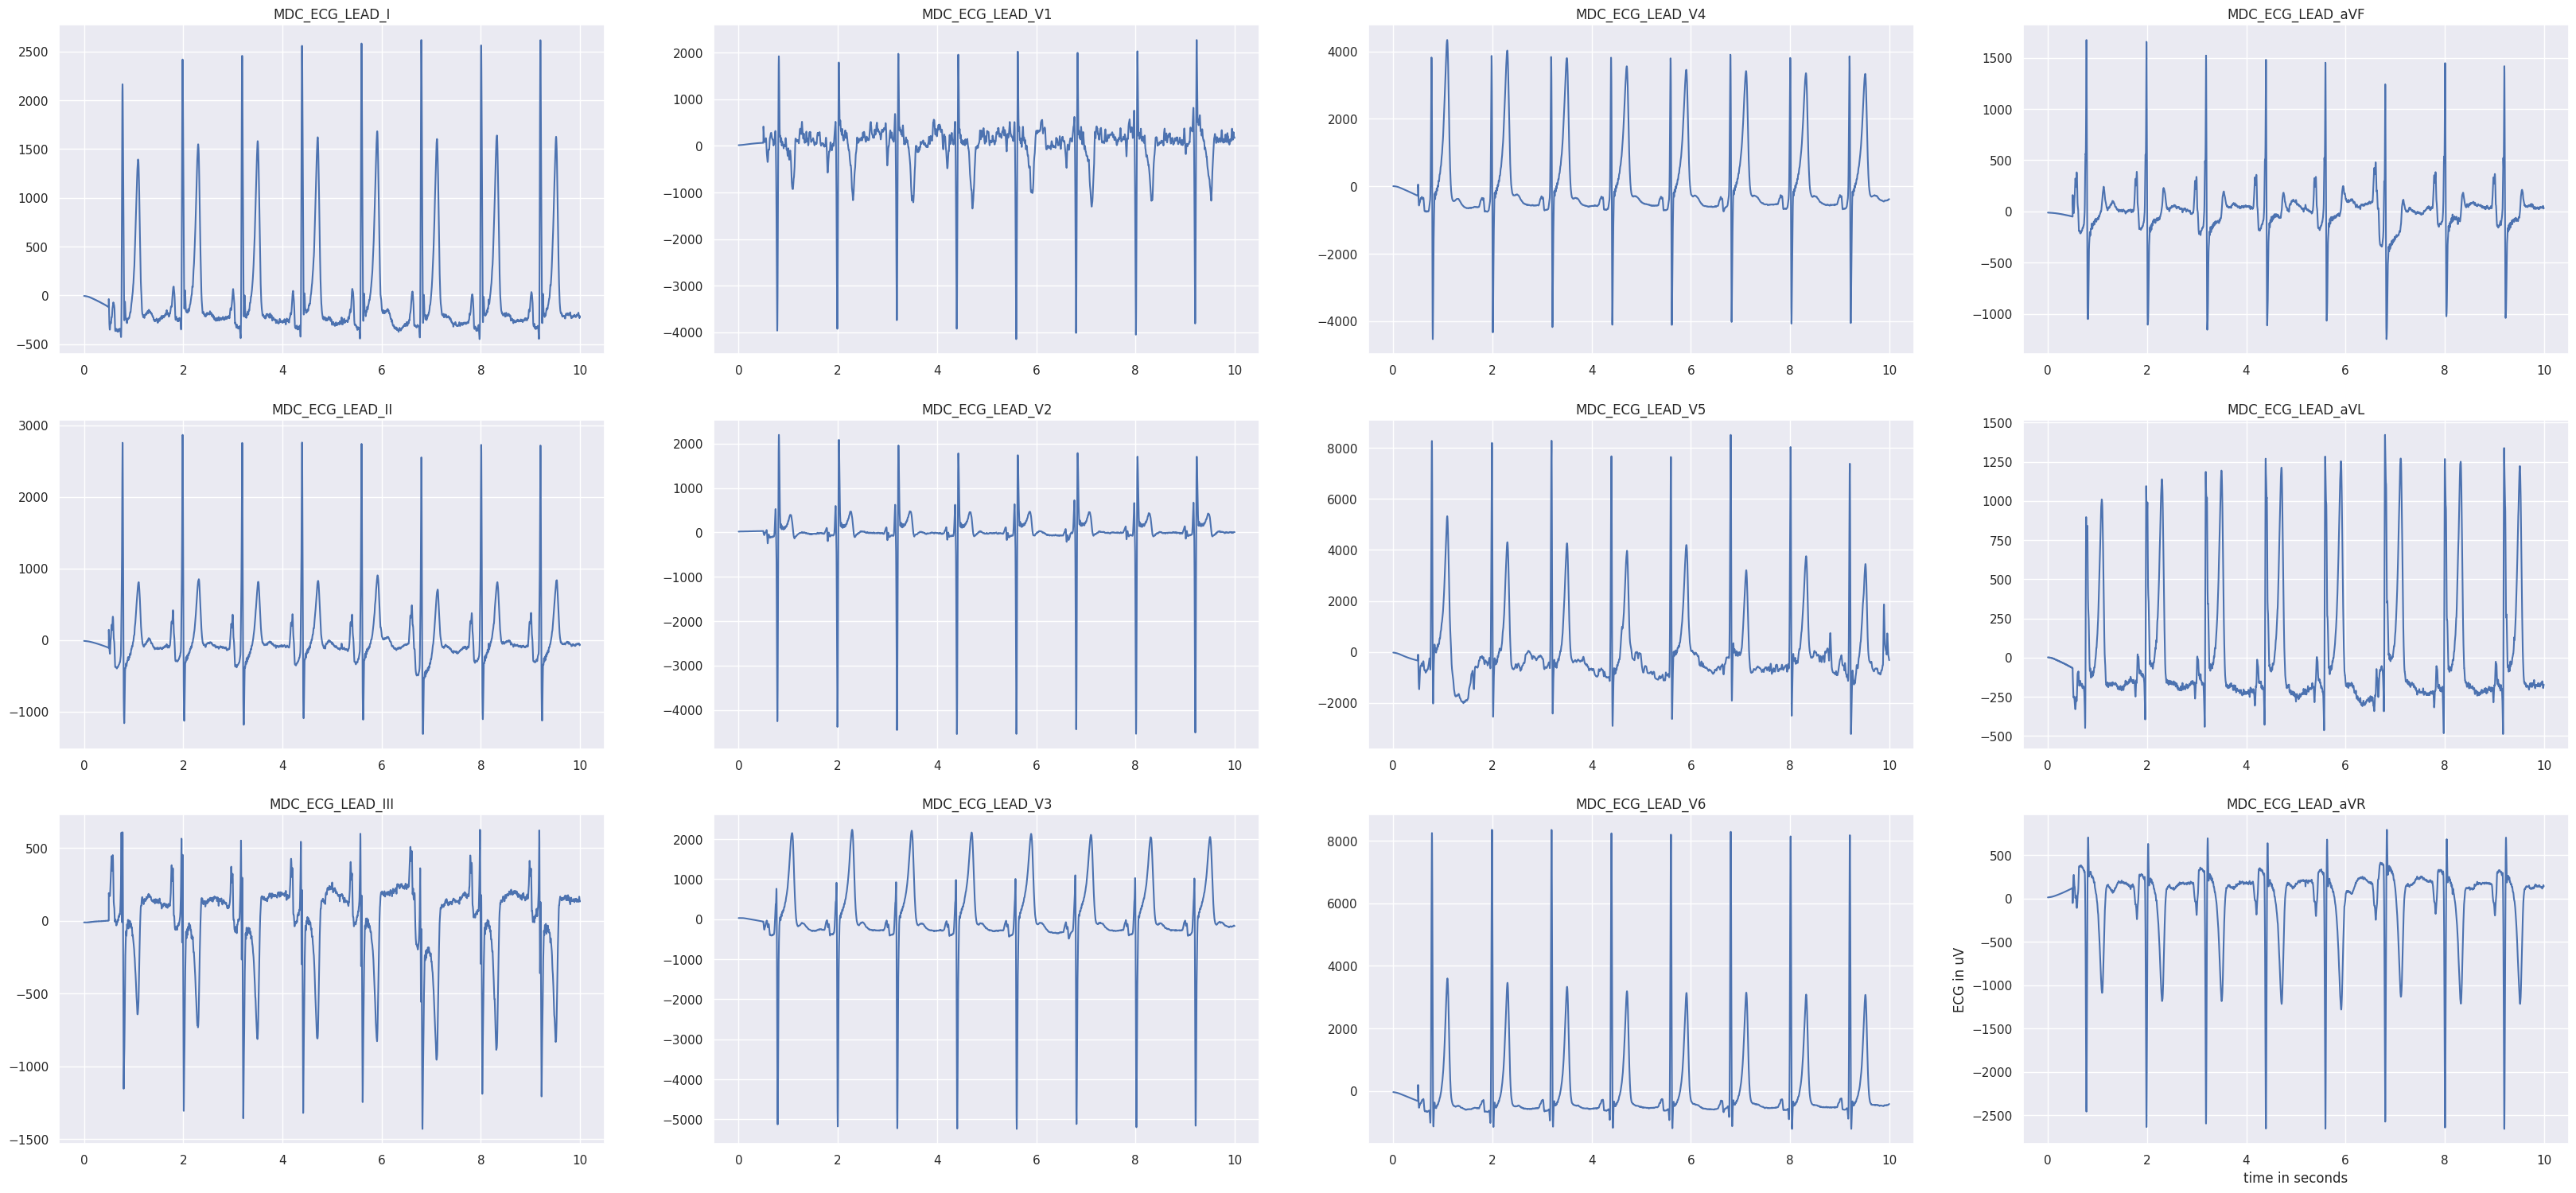

In [7]:
# increase size of plot 
plt.rcParams['figure.figsize'] = [20, 10]
vis_ecg(raw_signal_pivoted)

# Plot histogram and ecdf for p_ms at baseline visit


In [8]:
from pheno_utils.basic_plots import hist_ecdf_plots

In [9]:
# filter out baseline visit
col = "p_ms"

df = pl[[col, 'age', 'sex', 'collection_date']].loc[:,:,"00_00_visit",:,:]

df.head()

,,,p_ms,age,sex,raw_ecg_time_series,processed_ecg_time_series,raw_ecg_time_series_wide,processed_ecg_time_series_wide
participant_id,cohort,array_index,,,,,,,
5516424321,10k,0,98.796804,54.447672,Female,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...
5027574288,10k,0,110.089571,54.169913,Male,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...
7783260382,10k,0,135.717458,45.892093,Male,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...
1178277844,10k,0,118.399289,44.435100,Female,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...
1622660825,10k,0,117.228797,44.621536,Male,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...,s3://pheno-synthetic-data/data/ecg/bulk/raw_ec...,s3://pheno-synthetic-data/data/ecg/bulk/proces...


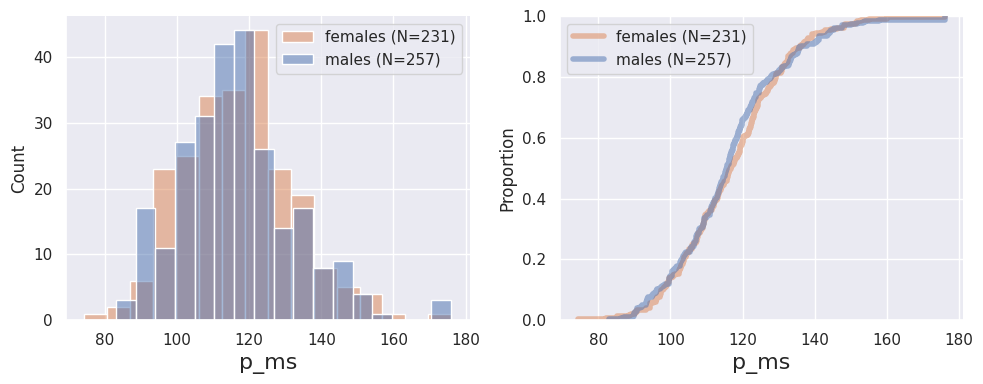

,count,mean,std,min,25%,50%,75%,max
p_ms,488.0,116.82092,15.591197,74.392255,106.459802,116.115695,124.781916,176.0


In [10]:
# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)

# Plot age-sex reference plots

In [11]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

In [12]:
data = pl[['p_ms', 'collection_date', 'sex', 'age']]

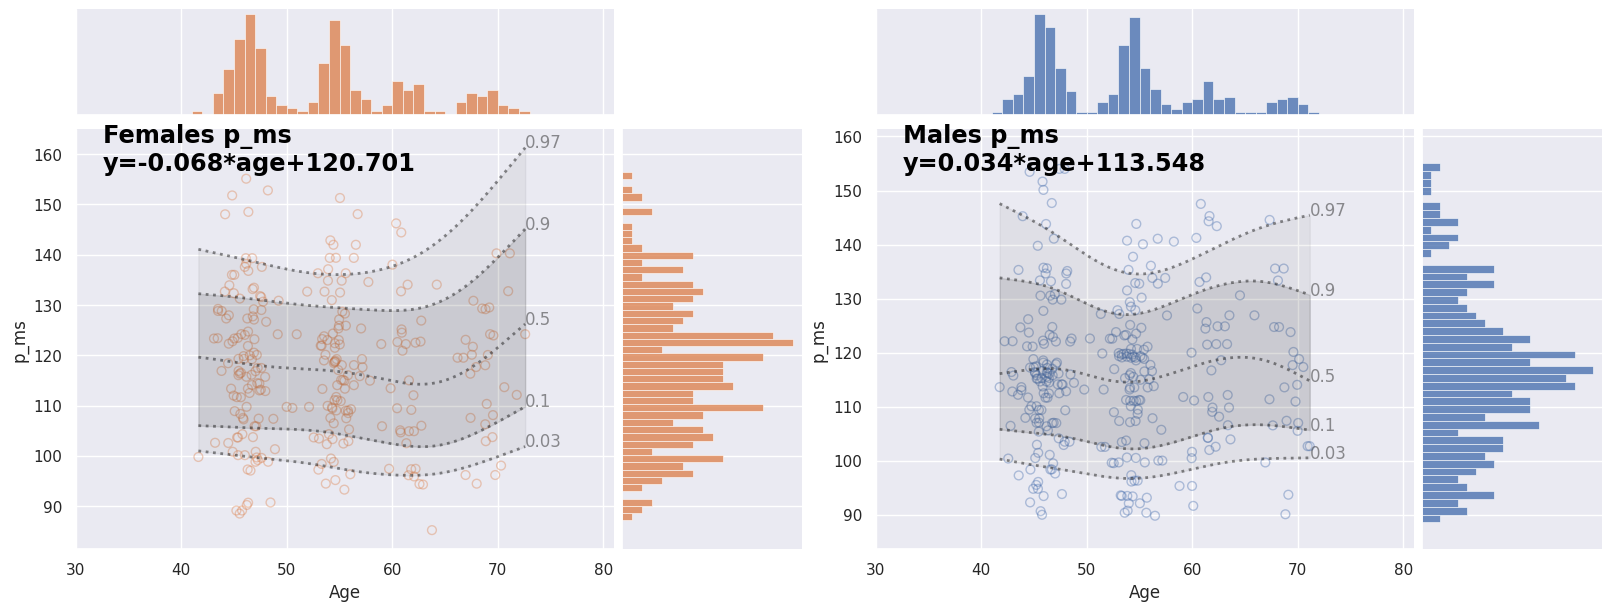

In [13]:
gender_refplots = GenderAgeRefPlot(data.dropna(subset=[col,"sex", "age"]), col, age_col="age")
gender_refplots.plot()